## Importações de Bibliotecas

In [148]:
# Biblioteca para analise e importações dos arquivos 
import pandas as pd
import matplotlib.pyplot as plt
 

### Fazendo conexão com o DRIVE. 

### 1. Definição do Problema

# Taxas de Desistência no Ensino Superior do Distrito Federal
Análise das Taxas de Desistência no Ensino Superior do Distrito Federal: Um Estudo nas Dez Instituições Mais Bem Avaliadas pelo MEC em 2021

## Objetivo da Análise
Este estudo tem como objetivo analisar e compreender os fatores associados às taxas de desistência em cursos de graduação no Distrito Federal. A investigação será conduzida com base em dados públicos extraídos de plataformas governamentais, que abrangem informações sobre instituições de ensino superior públicas e privadas. Para fins de recorte metodológico, a amostra será composta pelas dez instituições de ensino superior do DF que obtiveram as melhores avaliações segundo o Índice Geral de Cursos (IGC) do Ministério da Educação (MEC) no ano de 2021.

## Justificativa
A escolha por focar apenas nas dez instituições de ensino superior mais bem avaliadas do Distrito Federal tem como objetivo garantir maior clareza e confiabilidade na análise. Essas instituições costumam ter estruturas mais organizadas e sistemas de gestão mais transparentes, o que facilita o acesso a dados mais completos e padronizados. Além disso, ao analisar faculdades com bom desempenho, buscamos entender se a evasão estudantil também ocorre em contextos considerados positivos — o que pode apontar para questões mais amplas e estruturais no ensino superior brasileiro. Essa delimitação também está relacionada ao fato de este ser um trabalho de início de graduação, o que exige um recorte de dados menor e mais viável, sem a necessidade de incluir todas as instituições do DF ou de outros estados do país.




### 2. Coleta de Dados

### Criando função para otimizara leitura dos arquivos.

In [149]:
def importando_dados(lista_caminho:list[str]):

    # Data frame criado para poder guardar a junção de todos os DataFrames. 
    juntando_dataFrames = pd.DataFrame()

    # Laço for para que ocorra a leitura de todos os arquivos csv de acordo com seus caminhos(caminho local)
    for arquivo in lista_caminho:

        # Listar todas as colunas no arquivo, afim de não baixar todo o arquivo antes de excluir as colunas rejeitadas.
        todas_colunas = pd.read_csv(arquivo, nrows=0,encoding="ISO-8859-1", sep=';').columns.tolist()

        # Definir as colunas que você quer excluir
        # Essas colunas  estão sendo tiradas por se tratar apenas de dados do distrito_Federal, sem necessidade da permanencia de informações implicitamente informadas.
        colunas_para_excluir = ['NO_REGIAO', 'CO_REGIAO','NO_UF','CO_UF','CO_MUNICIPIO','NO_MUNICIPIO','IN_CAPITAL']

        # Listar as colunas que você deseja manter
        colunas_para_manter = [coluna for coluna in todas_colunas if coluna not in colunas_para_excluir]

        # Carregar o arquivo com apenas as colunas que você quer manter
        df = pd.read_csv(arquivo, usecols=colunas_para_manter,encoding="ISO-8859-1", sep=';')

        # Utilizando do groupby para que somente as informações referente ao Distrito-Federal(DF) permaneçam.
        dados_df = df.groupby(['SG_UF'] ).get_group('DF')

        # Juntando os novos DataFrames com os anteriores. 
        juntando_dataFrames = pd.concat([dados_df,juntando_dataFrames],axis=0)

    return juntando_dataFrames

In [150]:
# Criando lista de caminhos onde os arquivos estão sendo mantidos.
caminhos_lista = [
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2023\\dados\\MICRODADOS_CADASTRO_CURSOS_2023.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2022\\dados\\MICRODADOS_CADASTRO_CURSOS_2022.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2021\\dados\\MICRODADOS_CADASTRO_CURSOS_2021.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2020\\dados\\MICRODADOS_CADASTRO_CURSOS_2020.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2019\\dados\\MICRODADOS_CADASTRO_CURSOS_2019.CSV",
    "D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2018\\dados\\MICRODADOS_CADASTRO_CURSOS_2018.CSV",
    
]


In [151]:
# Criando o DataFrame para receber o arquivo somente com os Dados do Distrito-Federal( DF)
dados_censo_DF = importando_dados(caminhos_lista).reset_index(drop=True)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_3568\288032912.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, usecols=colunas_para_manter,encoding="ISO-8859-1", sep=';')
C:\Users\Thiago\AppData\Local\Temp\ipykernel_3568\288032912.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  dados_df = df.groupby(['SG_UF'] ).get_group('DF')
C:\Users\Thiago\AppData\Local\Temp\ipykernel_3568\288032912.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, usecols=colunas_para_manter,encoding="ISO-8859-1", sep=';')
C:\Users\Thiago\AppData\Local\Temp\ipykernel_3568\288032912.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

In [152]:
# Importando somente os dados sigla da universidade, para ter os nomes das mesma para melhor identificação
df_cadastro_ies = pd.read_csv("D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Microdados do Censo da Educação Superior 2023\\dados\\MICRODADOS_ED_SUP_IES_2023.csv",sep=';',encoding="ISO-8859-1",usecols=['CO_IES','SG_IES'])

In [153]:
# Juntando Dataframe com os dados das instituições junto com suas respectivas Siglas.
dados_censo_DF_SGIS = pd.merge(dados_censo_DF,df_cadastro_ies,on='CO_IES',how='inner')

In [154]:
# Visualizando Dataframe completo.
dados_censo_DF_SGIS.head(3)

,NU_ANO_CENSO,SG_UF,TP_DIMENSAO,TP_ORGANIZACAO_ACADEMICA,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,CO_IES,NO_CURSO,CO_CURSO,NO_CINE_ROTULO,...,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA,CO_CINE_ROTULO2,IN_COMUNITARIA,IN_CONFESSIONAL,SG_IES
0,2018,DF,1,1,1,1,2,ABI - ARTES CÊNICAS,5001035,ABI Artes e humanidades,...,8.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,UNB
1,2018,DF,1,1,1,1,2,ABI - ARTES PLÁSTICAS,5001034,ABI Artes e humanidades,...,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,UNB
2,2018,DF,1,1,1,1,2,ABI - CIÊNCIAS SOCIAIS,5001037,"ABI Ciências sociais, comunicação e informação",...,24.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,UNB


In [155]:
# Visualizando todas as instituições disponíveis.
dados_censo_DF_SGIS['SG_IES'].unique()

array(['UNB', 'UNIP', 'UNICEUB', 'UCB', 'UPIS', 'UDF', 'FADM', 'IESB',
       'UNIEURO', 'Anhanguera DF', 'UNIPLAN', 'FACEF', 'UNIPROJEÇÃO',
       'ESTÁCIO BRASÍLIA', 'FAPRO', 'FACBRAS', 'FALBE', 'UNIPROCESSUS',
       nan, 'ISALBE', 'UNILS', 'FTBB', 'Unicesp', 'FACULDADE FABRAS',
       'UNIMAUÁ', 'FAC CCI', 'ICESP', 'APOGEU', 'UNICEPLAC', 'IDP-BSB',
       'FATEO', 'IFB', 'FACHORIZONTE', 'ISCP', 'FANASPS', 'FATECNA',
       'ESAS', 'FACDF', 'FPMB', 'ATAME', 'FACTI', 'ISCON', 'FACE',
       'MACKENZIE', 'UNAR', 'CLARETIANOBT', 'UNIUBE', 'UNESA', 'UMESP',
       'UNICSUL', 'Unopar', 'UB', 'FMU', 'UNISA', 'UNIFACS', 'UCDB',
       'UNICID', 'UAM', 'Univeritas UNG', 'UNISUL', 'UNICNEC', 'UNIDERP',
       'UNIGRAN', 'UNICEUMA', 'UP', 'UNICESUMAR', 'UNIFAEL',
       'ESTÁCIO RIBEIRÃO PRE', 'UNIFACCAMP', 'UNASP', 'UNIASSELVI',
       'UNIDOM - BOSCO', 'UNINTER', 'UNIGRANDE', 'AIEC / FAAB', 'EBAPE',
       'UNINASSAU', 'UNIS-MG', 'UNIFACVEST', 'SENACSP', 'UNISIGNORELLI',
       'FACAP', 'Na

| Nome da instituição                          | Sigla       | Categoria Administrativa    | Organização Acadêmica | IGC | Ano  | Link (MEC/e-MEC)                                                                                                        |
| -------------------------------------------- | ----------- | --------------------------- | --------------------- | --- | ---- | ----------------------------------------------------------------------------------------------------------------------- |
| Universidade de Brasília                     | UNB         | Pública federal             | Universidade          | 5   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/Mg==)     |
| Instituto Federal de Brasília                | IFB         | Pública federal             | Instituto Federal     | 4   | 2021 | – (sem página e-MEC disponível)                                                                                         |
| Universidade Católica de Brasília            | UCB         | Privada sem fins lucrativos | Universidade          | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/NDAz)     |
| Centro Univ. de Brasília                     | UNICEUB     | Privada sem fins lucrativos | Centro Universitário  | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/NDAy)     |
| Centro Univ. do Distrito Federal             | UDF         | Privada com fins lucrativos | Centro Universitário  | 3   | 2022 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/NTE4)     |
| Centro Univ. IES Brasília                    | IESB        | Privada com fins lucrativos | Centro Universitário  | 3   | 2022 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/MTA2MA==) |
| Centro Univ. Planalto Central (UNICEPLAC)    | UNICEPLAC   | Privada sem fins lucrativos | Centro Universitário  | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/NTQzOQ==) |
| Centro Univ. LS (Centro Universitário LS)    | UNILS       | Privada com fins lucrativos | Centro Universitário  | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/MzM5Ng==) |
| Centro Univ. Projeção (Sobradinho)           | UNIPROJEÇÃO | Privada sem fins lucrativos | Centro Universitário  | 4   | 2021 | [Consulta e-MEC](https://emec.mec.gov.br/emec/consulta-cadastro/detalhes-ies/d96957f455f6405d14c6542552b0f6eb/MTUzOA==) |
| Instituto Brasileiro de Ensino, Desenvolvimento e Pesquisa de Brasília | IDP-BSB     | Privada    | Faculdade             | 4   | 2021 | – (sem página e-MEC disponível)                                                                                         |


In [156]:
# SELECIONANDO AS MELHORES FACULDADES PUBLICAS E PRIVADAS DE ACORDO COM A NOTA DO MEC NO DF
censo_DF_faculdades = dados_censo_DF_SGIS[dados_censo_DF_SGIS['SG_IES'].isin(['UNB','IFB','UNILS','UCB','IESB','UNICEUB','UNICEPLAC','UDF','IDP-BSB','UNIPROJEÇÃO'])]

Durante a etapa de pré-processamento dos dados, identificamos um total de 197 variáveis disponíveis para análise. Considerando o escopo do trabalho e o objetivo de manter um foco mais direcionado, optamos por realizar uma seleção manual das colunas que poderiam contribuir de forma mais direta para a compreensão das possíveis causas de desistência nos cursos de graduação.

A seleção levou em conta a relevância das variáveis para a análise, priorizando aquelas relacionadas a características dos cursos, perfil dos alunos, formas de ingresso, turnos, modalidades, entre outros fatores potencialmente associados à evasão. Após esse processo, reduzimos o número de variáveis para 71, listadas a seguir:

['NU_ANO_CENSO','SG_IES','CO_IES','NO_CURSO','TP_ORGANIZACAO_ACADEMICA','TP_REDE','NO_CINE_ROTULO','NO_CINE_AREA_GERAL','NO_CINE_AREA_ESPECIFICA','NO_CINE_AREA_DETALHADA','TP_GRAU_ACADEMICO','IN_GRATUITO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO','QT_VG_TOTAL',
"QT_ING_ENEM","QT_ING_VESTIBULAR",'QT_INSCRITO_TOTAL_EAD','QT_VG_TOTAL_EAD','QT_VG_TOTAL_DIURNO','QT_VG_TOTAL_NOTURNO','QT_MAT', 'QT_MAT_FEM', 'QT_MAT_MASC', 'QT_MAT_DIURNO', 'QT_MAT_NOTURNO', 'QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29', 'QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49', 'QT_MAT_50_59', 'QT_MAT_60_MAIS', 'QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA', 'QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND', 'QT_CONC', 'QT_CONC_FEM', 'QT_CONC_MASC', 'QT_CONC_DIURNO', 'QT_CONC_NOTURNO', 'QT_CONC_0_17', 'QT_CONC_18_24', 'QT_CONC_25_29', 'QT_CONC_30_34', 'QT_CONC_35_39', 'QT_CONC_40_49', 'QT_CONC_50_59', 'QT_CONC_60_MAIS', 'QT_CONC_BRANCA', 'QT_CONC_PRETA', 'QT_CONC_PARDA', 'QT_CONC_AMARELA', 'QT_CONC_INDIGENA','QT_CONC_CORND','QT_MAT_NACESTRANG','QT_CONC_NACESTRANG','QT_MAT_DEFICIENTE', 'QT_CONC_DEFICIENTE','QT_MAT_FINANC','QT_CONC_FINANC','QT_MAT_PROCESCPUBLICA', 'QT_MAT_PROCESCPRIVADA', 'QT_MAT_PROCNAOINFORMADA','QT_CONC_PROCESCPUBLICA', 'QT_CONC_PROCESCPRIVADA', 'QT_CONC_PROCNAOINFORMADA']

Essa seleção visa manter o equilíbrio entre profundidade analítica e viabilidade de tratamento dos dados, considerando as limitações de tempo e escopo de um trabalho de graduação.

        Observação: durante o tratamento e análise dos dados, é provável que esse conjunto de variáveis ainda passe por otimizações adicionais, com a exclusão de colunas redundantes ou com baixa relevância para os objetivos da pesquisa

In [157]:
# SELECIONADO COLUNAS PARA ANÁLISE.
Colunas_para_censo= ['NU_ANO_CENSO','SG_IES','CO_IES','NO_CURSO','TP_ORGANIZACAO_ACADEMICA','TP_REDE','NO_CINE_ROTULO','NO_CINE_AREA_GERAL','NO_CINE_AREA_ESPECIFICA','NO_CINE_AREA_DETALHADA','TP_GRAU_ACADEMICO','IN_GRATUITO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO','QT_VG_TOTAL',
"QT_ING_ENEM","QT_ING_VESTIBULAR",'QT_INSCRITO_TOTAL_EAD','QT_VG_TOTAL_EAD','QT_VG_TOTAL_DIURNO','QT_VG_TOTAL_NOTURNO','QT_MAT', 'QT_MAT_FEM', 'QT_MAT_MASC', 'QT_MAT_DIURNO', 'QT_MAT_NOTURNO', 'QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29', 'QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49', 'QT_MAT_50_59', 'QT_MAT_60_MAIS', 'QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA', 'QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND', 'QT_CONC', 'QT_CONC_FEM', 'QT_CONC_MASC', 'QT_CONC_DIURNO', 'QT_CONC_NOTURNO', 'QT_CONC_0_17', 'QT_CONC_18_24', 'QT_CONC_25_29', 'QT_CONC_30_34', 'QT_CONC_35_39', 'QT_CONC_40_49', 'QT_CONC_50_59', 'QT_CONC_60_MAIS', 'QT_CONC_BRANCA', 'QT_CONC_PRETA', 'QT_CONC_PARDA', 'QT_CONC_AMARELA', 'QT_CONC_INDIGENA','QT_CONC_CORND','QT_MAT_NACESTRANG','QT_CONC_NACESTRANG','QT_MAT_DEFICIENTE', 'QT_CONC_DEFICIENTE','QT_MAT_FINANC','QT_CONC_FINANC','QT_MAT_PROCESCPUBLICA', 'QT_MAT_PROCESCPRIVADA', 'QT_MAT_PROCNAOINFORMADA','QT_CONC_PROCESCPUBLICA', 'QT_CONC_PROCESCPRIVADA', 'QT_CONC_PROCNAOINFORMADA']

In [158]:
# Quantidade de colunas escolhidas. 
len(Colunas_para_censo)

71

In [159]:
# Pegando os registros com apenas as colunas de interesse
dados_censo_DF = censo_DF_faculdades[Colunas_para_censo].reset_index(drop=True)

A amostra foi composta apenas pelas 10 faculdades do Distrito Federal consideradas as melhores pelo MEC, não representando todas as instituições da região. As faculdades selecionadas são: UNB, IFB, UNILS, UCB, IESB, UNICEUB, UNICEPLAC, UDF, IDP-BSB e UNIPROJEÇÃO.



In [160]:
# Visualizando se as faculdades desejadas estão no DataFrame - Estão sim.
dados_censo_DF['SG_IES'].unique()

array(['UNB', 'UNICEUB', 'UCB', 'UDF', 'IESB', 'UNIPROJEÇÃO', 'UNILS',
       'UNICEPLAC', 'IDP-BSB', 'IFB'], dtype=object)

In [161]:
dados_censo_DF.head(5)

,NU_ANO_CENSO,SG_IES,CO_IES,NO_CURSO,TP_ORGANIZACAO_ACADEMICA,TP_REDE,NO_CINE_ROTULO,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
0,2018,UNB,2,ABI - ARTES CÊNICAS,1,1,ABI Artes e humanidades,Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,20.0,25.0,0.0,0.0,0.0,0.0
1,2018,UNB,2,ABI - ARTES PLÁSTICAS,1,1,ABI Artes e humanidades,Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,20.0,37.0,0.0,0.0,0.0,0.0
2,2018,UNB,2,ABI - CIÊNCIAS SOCIAIS,1,1,"ABI Ciências sociais, comunicação e informação",Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,91.0,74.0,0.0,0.0,0.0,0.0
3,2018,UNB,2,ABI - COMUNICAÇÃO SOCIAL,1,1,"ABI Ciências sociais, comunicação e informação",Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,41.0,38.0,0.0,0.0,0.0,0.0
4,2018,UNB,2,ABI - DESIGN,1,1,ABI Artes e humanidades,Programas básicos,Programas básicos,Programas básicos,...,0.0,0.0,0.0,0.0,14.0,25.0,0.0,0.0,0.0,0.0


In [162]:
# Salvando dados somente do DF. #OBS: O SAS NAO RECONHECE O NAN, EU PRECISO DEIXAR OS VALORES VAZIOS DE OUTRA FORMA PARA O SAS IDENTIFICAR...POIS TAMBEM QUERO FAZER UMA ANALISE LÁ. 
dados_censo_DF.to_csv("D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Censo_ed_sup_df.csv",sep=';',encoding="ISO-8859-1",index=False)

In [163]:
dados_censo_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NU_ANO_CENSO              3173 non-null   int64  
 1   SG_IES                    3173 non-null   object 
 2   CO_IES                    3173 non-null   int64  
 3   NO_CURSO                  3173 non-null   object 
 4   TP_ORGANIZACAO_ACADEMICA  3173 non-null   int64  
 5   TP_REDE                   3173 non-null   int64  
 6   NO_CINE_ROTULO            3173 non-null   object 
 7   NO_CINE_AREA_GERAL        3173 non-null   object 
 8   NO_CINE_AREA_ESPECIFICA   3173 non-null   object 
 9   NO_CINE_AREA_DETALHADA    3173 non-null   object 
 10  TP_GRAU_ACADEMICO         3094 non-null   float64
 11  IN_GRATUITO               3173 non-null   int64  
 12  TP_MODALIDADE_ENSINO      3173 non-null   int64  
 13  TP_NIVEL_ACADEMICO        3173 non-null   int64  
 14  QT_VG_TO

# LIMPEZA DE DADOS

In [164]:
# Visualizando dados gerais.
dados_censo_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NU_ANO_CENSO              3173 non-null   int64  
 1   SG_IES                    3173 non-null   object 
 2   CO_IES                    3173 non-null   int64  
 3   NO_CURSO                  3173 non-null   object 
 4   TP_ORGANIZACAO_ACADEMICA  3173 non-null   int64  
 5   TP_REDE                   3173 non-null   int64  
 6   NO_CINE_ROTULO            3173 non-null   object 
 7   NO_CINE_AREA_GERAL        3173 non-null   object 
 8   NO_CINE_AREA_ESPECIFICA   3173 non-null   object 
 9   NO_CINE_AREA_DETALHADA    3173 non-null   object 
 10  TP_GRAU_ACADEMICO         3094 non-null   float64
 11  IN_GRATUITO               3173 non-null   int64  
 12  TP_MODALIDADE_ENSINO      3173 non-null   int64  
 13  TP_NIVEL_ACADEMICO        3173 non-null   int64  
 14  QT_VG_TO

## Visualizando se possui dados duplicados

Verificar se há linhas repetidas no dataset.

In [165]:
# Verificando a quantidade total de dados duplicados no nosso DataFrame
dados_censo_DF.duplicated().sum()

np.int64(1)

In [166]:
# Visualizando de perto se de fato esse único dado duplicado é igual.
dados_censo_DF[dados_censo_DF.duplicated(keep=False)]

,NU_ANO_CENSO,SG_IES,CO_IES,NO_CURSO,TP_ORGANIZACAO_ACADEMICA,TP_REDE,NO_CINE_ROTULO,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
2758,2023,UCB,403,Gestão De Recursos Humanos,1,2,Gestão de pessoas,"Negócios, administração e direito",Negócios e administração,Gestão e administração,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2759,2023,UCB,403,Gestão De Recursos Humanos,1,2,Gestão de pessoas,"Negócios, administração e direito",Negócios e administração,Gestão e administração,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
# Eliminando linhas duplicadas. 
dados_censo_DF = dados_censo_DF.drop_duplicates().copy()
# Verificando se as linhas foram retiradas. 
dados_censo_DF.duplicated().sum()

np.int64(0)

## Verificando Dados ausentes(Dados Nullos)

Identificar valores nulos ou faltantes.

In [168]:
# Verificando quais colunas possuem pelo menos um dado NULO( FALTANTE )
# Utilização do metodo any com o intuito de pegar somente as colunas que possuem dados faltantes

dados_censo_DF[dados_censo_DF.columns[dados_censo_DF.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3172 entries, 0 to 3172
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TP_GRAU_ACADEMICO      3093 non-null   float64
 1   QT_VG_TOTAL            3032 non-null   float64
 2   QT_INSCRITO_TOTAL_EAD  3032 non-null   float64
 3   QT_VG_TOTAL_EAD        3032 non-null   float64
 4   QT_VG_TOTAL_DIURNO     3032 non-null   float64
 5   QT_VG_TOTAL_NOTURNO    3032 non-null   float64
dtypes: float64(6)
memory usage: 173.5 KB


Primeira análise: 

    -Temos 6 colunas que possuem dados sem informação nenhuma(supostamente não significam nada)

    -Todas são númericas

    -Cinco colunas possuem as mesmas quantidades de linhas e tem por nome Quantidade de algo(Temos um padrão aqui)
        -Observa-se que são 140 linhas vazias.

In [169]:
# Observando somente as colunas que possuem valores vazios, tendo como base de procura uma delas.
# Foi verificado todas essas colunas pertencem ao mesmo registro, isto é, se uma está vazia a outra tambem está.
dados_censo_DF[dados_censo_DF['QT_VG_TOTAL'].isnull()][['QT_VG_TOTAL','QT_INSCRITO_TOTAL_EAD','QT_VG_TOTAL_EAD','QT_VG_TOTAL_DIURNO','QT_VG_TOTAL_NOTURNO']]

,QT_VG_TOTAL,QT_INSCRITO_TOTAL_EAD,QT_VG_TOTAL_EAD,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO
391,NaN,NaN,NaN,NaN,NaN
392,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
945,NaN,NaN,NaN,NaN,NaN
946,NaN,NaN,NaN,NaN,NaN
947,NaN,NaN,NaN,NaN,NaN
948,NaN,NaN,NaN,NaN,NaN


In [170]:
# É Verificado que das 10 Universidades e faculdades, apenas essas cincos possuem esses valores vazios nessas colunas.
# É verificado que em sua maioria , pertencem ao IESB E UCB
dados_censo_DF[dados_censo_DF['QT_VG_TOTAL'].isnull()]['SG_IES'].value_counts()

SG_IES
UCB            47
IESB           47
UNICEUB        25
UNIPROJEÇÃO    19
UNB             2
Name: count, dtype: int64

Iremos tentar entender qual o possível motivo desses valores vazios. Quem sabe achar algum padrão

In [171]:
# Verificando se é algum curso especifico ( Existe muitos curso, o problema não é o curso)
dados_censo_DF[dados_censo_DF['QT_VG_TOTAL'].isnull()]['NO_CINE_ROTULO'].unique()

array(['Geografia formação de professor', 'Teatro formação de professor',
       'Administração', 'Sistemas de informação', 'Banco de dados',
       'Contabilidade', 'Gestão da tecnologia da informação',
       'Gestão de pessoas', 'Gestão financeira', 'Gestão pública',
       'Marketing', 'Gestão de negócios', 'Segurança da informação',
       'Economia', 'Comércio exterior', 'Filosofia formação de professor',
       'Filosofia', 'Turismo', 'Letras português formação de professor',
       'Logística', 'Pedagogia',
       'Formação pedagógica de professor para a educação básica',
       'Redes de computadores', 'Segurança pública', 'Serviço social',
       'Gestão de serviços', 'Biomedicina', 'Design de interiores',
       'Design gráfico', 'Engenharia civil', 'Farmácia',
       'Gestão comercial', 'Gestão hospitalar', 'Gestão da qualidade',
       'Serviços jurídicos e cartoriais', 'Empreendedorismo',
       'Engenharia de software', 'Engenharia elétrica', 'Eventos',
       'Gestão do

In [172]:
# Verificando o ANO DO CURSO( foi verificado que dos 6 ANOS, apenas dois possuem dados vazios - 2018 e 2019)
dados_censo_DF[dados_censo_DF['QT_VG_TOTAL'].isnull()]['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO
2019    75
2018    65
Name: count, dtype: int64

In [173]:
# Verificando a quantidade total de dados para cada ano
dados_censo_DF['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO
2023    582
2022    561
2020    541
2021    538
2019    494
2018    456
Name: count, dtype: int64

QUAL A DECISÃO SOBRE ESSES 140 DADOS VAZIOS?

"Serão removidos OS dados vazios dos anos de 2018 e 2019, ficando apenas com os restantes"

📊 Situação:

Total de registros em 2018: 456

Registros com nulos em 2018: 65

→ 14,25% dos dados de 2018 estão nulos

Total de registros em 2019: 494

Registros com nulos em 2019: 75

→ 15,18% dos dados de 2019 estão nulos

Ainda sobra cerca de 80% dos Dados, que é o suficiente para termos uma realidade coerente sobre aqueles anos 



In [174]:
dados_censo_DF[dados_censo_DF['TP_GRAU_ACADEMICO'].isnull()]['NU_ANO_CENSO'].value_counts()   

NU_ANO_CENSO
2023    17
2018    16
2019    16
2020    15
2021    15
Name: count, dtype: int64

In [175]:
# Retirando todos os dados Nulos do DataFrame. Incluindo o da coluna  TP_GRAU_ACADEMICO
dados_censo_DF_sem_nullos = dados_censo_DF.dropna().copy()


In [176]:
# Verificando se a valores Nullos após a exclusão ( DEU TUDO CERTO)
dados_censo_DF_sem_nullos.isnull().any().sum()

np.int64(0)

In [177]:
# Verificando se a valores Nullos após a exclusão ( DEU TUDO CERTO)
dados_censo_DF_sem_nullos[dados_censo_DF_sem_nullos.columns[dados_censo_DF_sem_nullos.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2953 entries, 15 to 3170
Empty DataFrame


In [178]:
# Não está muito bem distribuido
dados_censo_DF_sem_nullos['SG_IES'].value_counts()

SG_IES
UNB            769
IESB           478
UCB            452
UNICEUB        365
UNIPROJEÇÃO    230
UDF            215
IFB            164
UNICEPLAC      139
UNILS          108
IDP-BSB         33
Name: count, dtype: int64

In [179]:
# O ano está bem distribuido.
dados_censo_DF_sem_nullos['NU_ANO_CENSO'].value_counts()

NU_ANO_CENSO
2023    565
2022    561
2020    526
2021    523
2019    403
2018    375
Name: count, dtype: int64

### Remoção de dados estrategicos

### Foi decidio que ficariamos apenas com 6 instituições. explicação abaixo.

📌 Distribuição por Instituição (SG_IES)
Instituição	Registros	Porcentagem aproximada

| Instituição     | Registros | Porcentagem aproximada |
| --------------- | --------- | ---------------------- |
| **UNB**         | 769       | \~25%                  |
| **IESB**        | 478       | \~16%                  |
| **UCB**         | 452       | \~15%                  |
| **UNICEUB**     | 365       | \~12%                  |
| **UNIPROJEÇÃO** | 230       | \~8%                   |
| **UDF**         | 215       | \~7%                   |
| **IFB**         | 164       | \~5%                   |
| **UNICEPLAC**   | 139       | \~5%                   |
| **UNILS**       | 108       | \~4%                   |
| **IDP-BSB**     | 33        | \~1%                   |



🎯 Análise crítica
✅ Pontos positivos:

Temos 10 instituições diferentes, o que já dá uma boa diversidade.

A UNB tem mais de 700 registros, o que permite análises bem detalhadas nela.

⚠️ Pontos de atenção:

A distribuição não é equilibrada: mais da metade dos dados está concentrada em apenas 3 instituições (UNB, IESB, UCB).

Algumas instituições como IDP-BSB têm pouquíssimos dados — análises sobre elas serão menos confiáveis ou até inviáveis.

📌 O que isso significa para sua análise de evasão?

Possivel escolha:

Focar nas instituições com dados suficientes, pode usar as 6 ou 7 maiores (UNB até UDF, por exemplo).

Analisar evasão em todo o DF, vai precisar deixar claro que a amostra tem maior peso de certas instituições e isso pode influenciar os resultados.



In [180]:
# lista para selecionar apenas as instituições que possuam acima de 6% de informações.
instituicoes = ["UNB","IESB","UCB","UNICEUB","UNIPROJECAO","UDF"]
novo_dados_censo_DF = dados_censo_DF_sem_nullos[dados_censo_DF_sem_nullos['SG_IES'].isin(instituicoes)].copy()
# Verificando se foi bem sucedido a escolha das instituições.
novo_dados_censo_DF['SG_IES'].unique()

array(['UNB', 'UNICEUB', 'UCB', 'UDF', 'IESB'], dtype=object)

In [181]:
# Verificando a quantidade de registros que sobraram

print("Linhas:",novo_dados_censo_DF.shape[0])
print("Colunas:",novo_dados_censo_DF.shape[1])

Linhas: 2279
Colunas: 71


Colunas que não precisamos :
- CO_IES (Ja Possuimos o SG_IES, para identifição das instituições )
- TP_NIVEL_ACADEMICO(TRAZ UMA INFORMAÇÃO DE CERTA FORMA, IGUAL A DA TP_GRAU_ACADEMICO)
- 

## Correção de tipos de dados

Garantir que cada coluna tenha o tipo certo (string, int, float, datetime etc).

In [182]:
novo_dados_censo_DF.info(show_counts=False,memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2279 entries, 15 to 3150
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   NU_ANO_CENSO              int64  
 1   SG_IES                    object 
 2   CO_IES                    int64  
 3   NO_CURSO                  object 
 4   TP_ORGANIZACAO_ACADEMICA  int64  
 5   TP_REDE                   int64  
 6   NO_CINE_ROTULO            object 
 7   NO_CINE_AREA_GERAL        object 
 8   NO_CINE_AREA_ESPECIFICA   object 
 9   NO_CINE_AREA_DETALHADA    object 
 10  TP_GRAU_ACADEMICO         float64
 11  IN_GRATUITO               int64  
 12  TP_MODALIDADE_ENSINO      int64  
 13  TP_NIVEL_ACADEMICO        int64  
 14  QT_VG_TOTAL               float64
 15  QT_ING_ENEM               float64
 16  QT_ING_VESTIBULAR         float64
 17  QT_INSCRITO_TOTAL_EAD     float64
 18  QT_VG_TOTAL_EAD           float64
 19  QT_VG_TOTAL_DIURNO        float64
 20  QT_VG_TOTAL_NOTURNO       float64


Colunas que precisam ter seu tipo de dados alterados:

-NU_ANO_CENSO - O ano precisa ser TIPO DATA e não int (OK)
- Segue abaixo dados que tem um tipo de dado categorico Nominais( mas está como int, é necessario uma transformação)

    -TP_ORGANIZACAO_ACADEMICA (OK)

    -TP_REDE (OK)

    -TP_GRAU_ACADEMICO 
        
        (# OBS: FOI VERIFICADO QUE NO DICIONARIO TEMOS A CHAVE 4 (Bacharelado e Licenciatura), MAS NÃO FOI LOCALIZADO NOS DADOS ESSA CHAVE(ERRO DE COLETA? PRECISA LEVAR EM CONSIDERAÇÃO NA ANLISE.) - ISSO É SOBRE O GRAU ACADEMICO) (OK)

    -IN_GRATUITO (OK)

    -TP_MODALIDADE_ENSINO (OK)
    
    -TP_NIVEL_ACADEMICO 
        
        (# NÃO ACHO NECESSARIO COLOCAR ESSA COLUNA(NIVEL ACADEMICO), ANTES POR QUE A MESMA POSSUI APENAS UMA INFORMAÇÃO. E PARECE SER A MESMA INFORMAÇÃO DA COLUNA TP_GRAU_ACADEMICO (PRECISA DE UMA ANALISE PARA ENTENDER) (OK)

        


In [183]:
# Corrigindo dado do ano de int para Data.
dados_tipo_corrigido_censo_DF = novo_dados_censo_DF.copy()
dados_tipo_corrigido_censo_DF['NU_ANO_CENSO'] = pd.to_datetime(dados_tipo_corrigido_censo_DF['NU_ANO_CENSO'])

In [184]:
# Visualizando a correção.
dados_tipo_corrigido_censo_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2279 entries, 15 to 3150
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   NU_ANO_CENSO              2279 non-null   datetime64[ns]
 1   SG_IES                    2279 non-null   object        
 2   CO_IES                    2279 non-null   int64         
 3   NO_CURSO                  2279 non-null   object        
 4   TP_ORGANIZACAO_ACADEMICA  2279 non-null   int64         
 5   TP_REDE                   2279 non-null   int64         
 6   NO_CINE_ROTULO            2279 non-null   object        
 7   NO_CINE_AREA_GERAL        2279 non-null   object        
 8   NO_CINE_AREA_ESPECIFICA   2279 non-null   object        
 9   NO_CINE_AREA_DETALHADA    2279 non-null   object        
 10  TP_GRAU_ACADEMICO         2279 non-null   float64       
 11  IN_GRATUITO               2279 non-null   int64         
 12  TP_MODALIDADE_ENSINO    

#### Criando dicionário(com seus respectivos nomes) para as colunas categoricas, para que possam ser transformados para uma linguagem facil de analise.

In [185]:
# Verificando valores ÚNICOS para não esquecer de nenhum dado categorico.

# Selecionando em lista as colunas que serão transformadas para categoricas.Para melhor otimização.
lista_categoricos = ['TP_ORGANIZACAO_ACADEMICA','TP_REDE','TP_GRAU_ACADEMICO','IN_GRATUITO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO']

for i in lista_categoricos:
    print(f'{i}',dados_tipo_corrigido_censo_DF[i].unique())

TP_ORGANIZACAO_ACADEMICA [1 2]
TP_REDE [1 2]
TP_GRAU_ACADEMICO [1. 2. 3. 0.]
IN_GRATUITO [1 0]
TP_MODALIDADE_ENSINO [1 2]
TP_NIVEL_ACADEMICO [1]


In [186]:
dic_TP_ORGANIZACAO_ACADEMICA = {1:"Universidade",
2: "Centro Universitário"}

dic_TP_REDE = {1:"Pública", 2:"Privada"}

# OBS: FOI VERIFICADO QUE NO DICIONARIO TEMOS A CHAVE 4 (Bacharelado e Licenciatura), MAS NÃO FOI LOCALIZADO NOS DADOS ESSA CHAVE(ERRO DE COLETA? PRECISA LEVAR EM CONSIDERAÇÃO NA ANLISE.) - ISSO É SOBRE O GRAU ACADEMICO
dic_TP_GRAU_ACADEMICO = {1:"Bacharelado",
2:"Licenciatura",
3:"Tecnológico",
0:"Não aplicável "}

dic_IN_GRATUITO = {0:"Não",1:"Sim"}

dic_TP_MODALIDADE_ENSINO = {1:"Presencial", 2:"Curso a distância"}

# NÃO ACHO NECESSARIO COLOCAR ESSA COLUNA, ANTES POR QUE A MESMA POSSUI APENAS UMA INFORMAÇÃO. E PARECE SER A MESMA INFORMAÇÃO DA COLUNA TP_GRAU_ACADEMICO (ANALISAR )
dic_TP_NIVEL_ACADEMICO  = {1:"Graduação"}

# Criando lista para utilização em tranformação das categorias
lista_dicionario = [dic_TP_ORGANIZACAO_ACADEMICA,dic_TP_REDE,dic_TP_GRAU_ACADEMICO,dic_IN_GRATUITO,dic_TP_MODALIDADE_ENSINO,dic_TP_NIVEL_ACADEMICO]

dados_tipo_corrigido_censo_DF['TP_NIVEL_ACADEMICO'].unique()



array([1])

In [187]:
# Novo DataFrame para receber os dados já categorizados
novos_dados_corrigido_censo_DF = dados_tipo_corrigido_censo_DF.copy()

# Laço for para transformar dados do type int em categoricos faceis de compreender e analisar. 
for i in zip(lista_categoricos,lista_dicionario):
   novo_dados_censo_DF[i[0]] = novo_dados_censo_DF[i[0]].map(i[1])


### Transformando colunas númericas em categoricas com linguagem fácil.  

In [188]:
novo_dados_censo_DF.head()

,NU_ANO_CENSO,SG_IES,CO_IES,NO_CURSO,TP_ORGANIZACAO_ACADEMICA,TP_REDE,NO_CINE_ROTULO,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
15,2018,UNB,2,ADMINISTRAÇÃO,Universidade,Pública,Administração,"Negócios, administração e direito",Negócios e administração,Gestão e administração,...,1.0,0.0,0.0,0.0,466.0,613.0,0.0,38.0,107.0,0.0
16,2018,UNB,2,AGRONOMIA,Universidade,Pública,Agronomia,"Agricultura, silvicultura, pesca e veterinária",Agricultura,"Produção agrícola, agropecuária e zootecnia",...,0.0,0.0,0.0,0.0,345.0,359.0,0.0,38.0,54.0,0.0
17,2018,UNB,2,ARQUITETURA E URBANISMO,Universidade,Pública,Arquitetura e urbanismo,"Engenharia, produção e construção",Arquitetura e construção,Arquitetura e planejamento urbano,...,0.0,0.0,0.0,0.0,188.0,351.0,0.0,9.0,61.0,0.0
18,2018,UNB,2,ARQUITETURA E URBANISMO,Universidade,Pública,Arquitetura e urbanismo,"Engenharia, produção e construção",Arquitetura e construção,Arquitetura e planejamento urbano,...,1.0,0.0,0.0,0.0,141.0,245.0,0.0,11.0,37.0,0.0
19,2018,UNB,2,ARQUIVOLOGIA,Universidade,Pública,Arquivologia,"Ciências sociais, comunicação e informação",Comunicação e informação,Ciência da informação e museologia,...,2.0,0.0,0.0,0.0,197.0,153.0,0.0,26.0,28.0,0.0


### Verificando se a transformação ocorreu como esperado.

In [189]:
for i in lista_categoricos:
    print(f'{i}',novo_dados_censo_DF[i].isnull().sum())


TP_ORGANIZACAO_ACADEMICA 0
TP_REDE 0
TP_GRAU_ACADEMICO 0
IN_GRATUITO 0
TP_MODALIDADE_ENSINO 0
TP_NIVEL_ACADEMICO 0


## Padronização de dados

In [190]:
# Salvando DataFrame para fazer sua analise de padronização em outro notebook.
novo_dados_censo_DF.to_csv("D:\\analise_de_Dados\\arquivos_Brutos\\Projeto_censo_educacao_superior\\Dados_para_normalizar_df_ed_sup.csv",sep=';',index=False)

### Normalizando dados, após análise bem detalhada.

In [191]:
import unicodedata # Serve para remover acentos e caracteres do texto

def normalizar(texto):
    if not isinstance(texto, str): # Verifica se o valor recebido é uma string, se  não for, transforma em uma.
        return str(texto)
    
    texto = texto.upper().strip() # Transformamos o valor recebido em maisculo, e apagamos os espaços na frente e atrás
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8') #
    return texto

In [192]:
# Listas de palavras que significam as mesmas coisas, mas por alguns detalhes aparecem diferentes.
col_cor_NO_CURSOS = {
    'LETRAS - PORTUGUES': 'LETRAS - LINGUA PORTUGUESA',
    'COMUNICACAO SOCIAL - JORNALISMO': 'JORNALISMO',
    'CIENCIA ECONOMICA': 'CIENCIAS ECONOMICAS',
    'GESTAO DE SERVICOS JURIDICOS': 'SERVICOS JURIDICOS'
}

col_cor_NO_CINE_ROTULO = {
    'ENGENHARIA DE COMPUTACAO': ['ENGENHARIA', 'COMPUTACAO'],
}


In [193]:
# Selecionando colunas que são strings.
colunas_objects = novo_dados_censo_DF.select_dtypes(include='object').columns
dados_censo_padronizado = novo_dados_censo_DF

# Transformando todas as variaveis categoricas em maisculas.


for i in colunas_objects:
    # Aplicando a função normalizar para cada dados de cada coluna de string.
    dados_censo_padronizado[i] = novo_dados_censo_DF[i].apply(lambda x: normalizar(x))

    # Essas colunas precisam de um tratamento especial, alem de se tornarem maisculas. 
    if i == 'NO_CURSO':
        dados_censo_padronizado[i] = dados_censo_padronizado[i].apply(lambda x: col_cor_NO_CURSOS.get(x, x))
    if i == 'NO_CINE_ROTULO':
        dados_censo_padronizado[i] = dados_censo_padronizado[i].apply(lambda x: col_cor_NO_CINE_ROTULO.get(x, x))

🛠️ O que foi feito na normalização dos dados
Pra deixar os dados mais organizados e confiáveis, precisei mandar o DataFrame pra outro notebook e analisar com calma cada coluna de texto. O objetivo era encontrar valores que pareciam diferentes, mas na verdade representavam a mesma coisa.

👀 O que eu encontrei:
Tinha curso escrito em maiúsculo e minúsculo, e por isso apareciam como se fossem diferentes (ex: letras - português e LETRAS - PORTUGUÊS).

Alguns nomes estavam com ou sem acentos, o que também causava duplicações.

E outros estavam com pequenas variações, como:

'CIENCIA ECONOMICA' e 'CIENCIAS ECONOMICAS' (só muda um "S")

'COMUNICACAO SOCIAL - JORNALISMO' e 'JORNALISMO', que são a mesma coisa, só que escrito de formas diferentes.

✂️ O que eu fiz:
Criei uma função chamada normalizar que:

Deixa tudo em maiúsculo

Tira acentos

Remove espaços desnecessários

Depois disso, usei dois dicionários pra corrigir alguns nomes específicos que ainda estavam diferentes, mesmo depois da limpeza:

col_cor_NO_CURSO = {
    'LETRAS - PORTUGUES': 'LETRAS - LINGUA PORTUGUESA',
    'COMUNICACAO SOCIAL - JORNALISMO': 'JORNALISMO',
    'CIENCIA ECONOMICA': 'CIENCIAS ECONOMICAS',
    'GESTAO DE SERVICOS JURIDICOS': 'SERVICOS JURIDICOS'
}

col_cor_NO_CINE_ROTULO = {
    'ENGENHARIA DE COMPUTACAO': ['ENGENHARIA', 'COMPUTACAO']
}

✅ Resultado:
Agora os cursos estão mais padronizados, com menos duplicidade e prontos pra análises mais confiáveis, como agrupamentos, gráficos e comparações.

In [239]:
# transformando ano.CO_IES para string(pois é categorico)
dados_censo_padronizado['NU_ANO_CENSO'] = dados_censo_padronizado['NU_ANO_CENSO'].astype(str)
dados_censo_padronizado['CO_IES'] = dados_censo_padronizado['CO_IES'].astype(str)

In [248]:
# Foi verificado que não há inscrições nem vagas disponiveis para EAD, ESTRANHO. 
# foi decidido que será retirado.
dados_censo_padronizado = dados_censo_padronizado.drop(columns=['QT_INSCRITO_TOTAL_EAD','QT_VG_TOTAL_EAD'])


# Exploração e visualização de Dados.

In [249]:
# Visualizando as colunas númericas
colunas_númericas = dados_censo_padronizado.select_dtypes(include="number").columns
# Visualizando as colunas Não númericas
colunas_N_númericas = dados_censo_padronizado.select_dtypes(exclude="number").columns


In [ ]:
# Visualização rápida das medidas estatisticas
dados_censo_padronizado[colunas_númericas].describe()

,QT_VG_TOTAL,QT_ING_ENEM,QT_ING_VESTIBULAR,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,...,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_MAT_FINANC,QT_CONC_FINANC,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA
count,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,...,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,143.805616,22.897323,31.741992,79.702501,64.103115,235.887231,131.121983,104.765248,144.523914,72.465116,...,1.650285,0.222905,64.285652,12.795086,130.525669,105.352348,0.009215,18.857832,18.211496,0.002194
std,210.008277,33.879790,68.832099,124.384261,102.007894,351.331237,226.328783,158.477387,258.935498,159.030832,...,4.286404,0.819742,153.445356,37.811413,188.848319,211.330934,0.095570,35.455718,37.243805,0.046798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,1.000000,0.000000,0.000000,51.000000,19.000000,19.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,26.000000,19.000000,0.000000,2.000000,1.000000,0.000000
50%,100.000000,16.000000,13.000000,60.000000,0.000000,153.000000,66.000000,61.000000,44.000000,0.000000,...,0.000000,0.000000,4.000000,0.000000,73.000000,60.000000,0.000000,10.000000,9.000000,0.000000
75%,180.000000,31.000000,30.000000,120.000000,111.500000,319.000000,165.000000,132.000000,207.000000,72.000000,...,2.000000,0.000000,64.000000,10.000000,170.500000,132.000000,0.000000,21.000000,23.000000,0.000000
max,2721.000000,707.000000,982.000000,1720.000000,1431.000000,5666.000000,3156.000000,2510.000000,3715.000000,1951.000000,...,74.000000,16.000000,2975.000000,800.000000,2078.000000,4235.000000,1.000000,625.000000,711.000000,1.000000


## 1. Quantos alunos ingressaram e quantos se formaram?

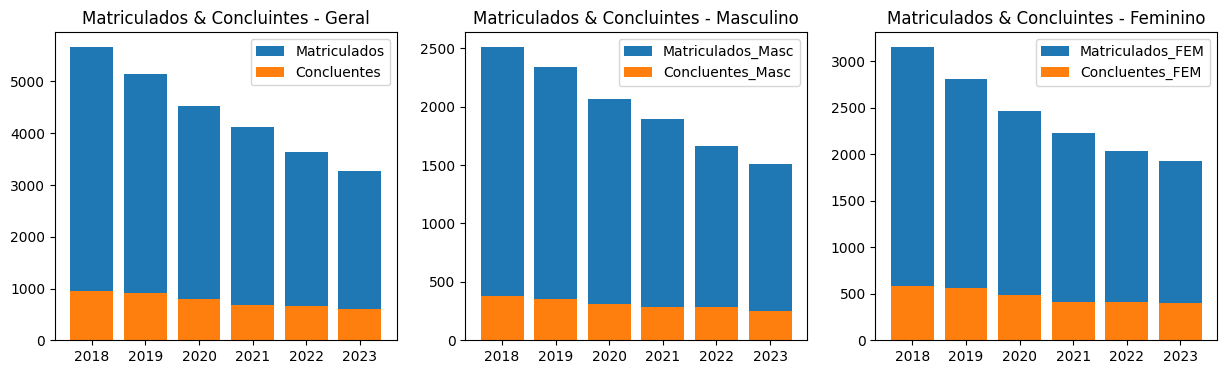

In [294]:
fig,ax = plt.subplots(1,3,figsize=(15,4))


ax[0].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_MAT'],label='Matriculados')
ax[0].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_CONC'],label='Concluentes')
ax[0].set_title("Matriculados & Concluintes - Geral")
ax[0].legend()

ax[1].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_MAT_MASC'],label='Matriculados_Masc')
ax[1].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_CONC_MASC'],label='Concluentes_Masc')
ax[1].set_title("Matriculados & Concluintes - Masculino")
ax[1].legend()

ax[2].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_MAT_FEM'],label='Matriculados_FEM')
ax[2].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_CONC_FEM'],label='Concluentes_FEM')
ax[2].set_title("Matriculados & Concluintes - Feminino")
ax[2].legend()

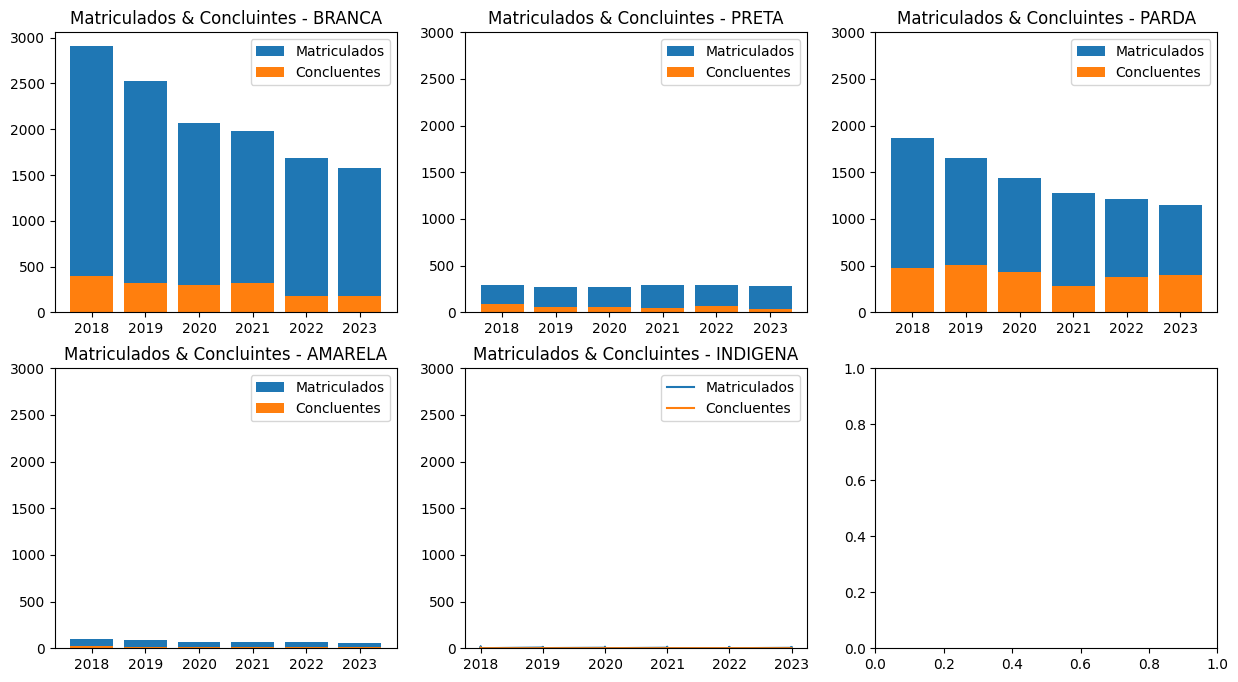

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(15,8))


ax[0][0].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_MAT_BRANCA'],label='Matriculados')
ax[0][0].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_CONC_BRANCA'],label='Concluentes')
ax[0][0].set_yticks([0,500,1000,1500,2000,2500,3000])
ax[0][0].set_title("Matriculados & Concluintes - BRANCA")
ax[0][0].legend()

ax[0][1].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_MAT_PRETA'],label='Matriculados')
ax[0][1].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_CONC_PRETA'],label='Concluentes')
ax[0][1].set_yticks([0,500,1000,1500,2000,2500,3000])
ax[0][1].set_title("Matriculados & Concluintes - PRETA")
ax[0][1].legend()

ax[0][2].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_MAT_PARDA'],label='Matriculados')
ax[0][2].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_CONC_PARDA'],label='Concluentes')
ax[0][2].set_yticks([0,500,1000,1500,2000,2500,3000])
ax[0][2].set_title("Matriculados & Concluintes - PARDA")
ax[0][2].legend()

ax[1][0].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_MAT_AMARELA'],label='Matriculados')
ax[1][0].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_CONC_AMARELA'],label='Concluentes')
ax[1][0].set_yticks([0,500,1000,1500,2000,2500,3000])
ax[1][0].set_title("Matriculados & Concluintes - AMARELA")
ax[1][0].legend()

ax[1][1].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_MAT_INDIGENA'],label='Matriculados')
ax[1][1].bar(dados_censo_padronizado['NU_ANO_CENSO'],dados_censo_padronizado['QT_CONC_INDIGENA'],label='Concluentes')
ax[1][1].set_yticks([0,500,1000,1500,2000,2500,3000])
ax[1][1].set_title("Matriculados & Concluintes - INDIGENA")
ax[1][1].legend()

def grafico_box_plot(dados,colunas):
    fig,ax = plt.subplots(6,10,figsize=(20,12))

    for i in range(6):
        for j in range(10):
            for coluna in colunas:
                ax[i][j].boxplot(dados[coluna])

grafico_box_plot(dados_censo_padronizado,colunas_númericas)